In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
warnings.simplefilter('ignore')

In [99]:
df=pd.read_csv('./train.csv')
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [100]:
n_rows, n_cols=df.shape
n_rows, n_cols

(114000, 21)

In [101]:
is_duplicate=df.index.duplicated().any()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [103]:
df=df.dropna()
col_drop=['Unnamed: 0']
df=df.drop(columns=col_drop)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

## Question : So sánh độ nổi tiếng giữa những nghệ sĩ có những bài hát tiêu cực và nghệ sĩ có những bài hát tích cực

**Mục đích:** 
* **Khả năng tạo ấn tượng:** Nghệ sĩ có những bài hát tích cực thường có khả năng tạo ấn tượng tích cực với người nghe, mang đến cảm xúc lạc quan và niềm vui. Ngược lại, những nghệ sĩ với những bài hát tiêu cực có thể tạo ra sự chấn động, nhưng có thể thu hút người nghe quan tâm đến các chủ đề nổi bật và tranh cãi.

* **Ảnh hưởng xã hội:** Những nghệ sĩ sáng tác những bài hát tích cực thường có thể gặt hái được sự ủng hộ lớn từ cộng đồng, vì thông điệp tích cực của họ có thể lan tỏa tới người nghe và xã hội. Ngược lại, những nghệ sĩ với những bài hát tiêu cực có thể phải đối mặt với sự phê phán và tranh cãi từ một số người nghe.

* **Thị trường âm nhạc:** Thị trường âm nhạc có thể ưa chuộng các bài hát tích cực hoặc tiêu cực tùy thuộc vào xu hướng và sở thích của thời đại. Có thể có những thời kỳ nơi mà người nghe đặc biệt quan tâm đến một loại thông điệp âm nhạc hơn là loại khác.

**Ý nghĩa:**
* Phản ánh sự ảnh hưởng của âm nhạc đối với khán giả và cộng đồng. 

**Các bước thực hiện:**

**Bước 1: Những bài có nhiều artist trở lên sẽ được tách ra và trải dài trong dataframe**

In [122]:
# Những bài có nhiều artist trở lên sẽ được tách ra và trải dài trong dataframe
df_copy=df
df_long = df_copy.assign(artists=df_copy['artists'].str.split(';')).explode('artists')
#Lấy ra những cột cần thiết để trả lời câu hỏi
question_col=['artists','popularity','valence']
df_question=df_long[question_col]
#Lọc ra những giá trị popularity và valence = 0
def is_positive(n): 
    return n  == 0 
df_question=df_question[is_positive(df_question['popularity'])==False]
df_question=df_question[is_positive(df_question['valence'])==False]
df_question

,artists,popularity,valence
0,Gen Hoshino,73,0.7150
1,Ben Woodward,55,0.2670
2,Ingrid Michaelson,57,0.1200
2,ZAYN,57,0.1200
3,Kina Grannis,71,0.1430
...,...,...,...
113995,Rainy Lullaby,21,0.0339
113996,Rainy Lullaby,22,0.0350
113997,Cesária Evora,22,0.7430
113998,Michael W. Smith,41,0.4130


**Bước 2: đếm số lượng bài hát của nghệ sĩ lưu lại thành cột weight**

In [120]:
# đếm số lượng bài hát của nghệ sĩ lưu lại thành cột weight
count_per_artist = df_question['artists'].value_counts()
df_question['weight'] = df_question['artists'].map(count_per_artist)
df_question1=df_question

**Bước 3:**
* Lọc ra những nghệ sĩ có hơn 100 bài hát
* Tính toán dựa trên valence và popularity
* Tính toán theo nghệ sĩ 
* Lưu trung bình độ nổi tiếng của nghệ sĩ vào dataframe

In [112]:
#Lọc ra những nghệ sĩ có hơn 100 bài hát
df_filtered = df_question1[df_question1['weight'] > 100]
# Tính toán dựa trên valence và popularity
Avg_popularity_filtered = (df_filtered['popularity'] * df_filtered['weight']).sum() / df_filtered['weight'].sum()
Avg_valence_filtered = (df_filtered['valence'] * df_filtered['weight']).sum() / df_filtered['weight'].sum()

# Tính toán theo nghệ sĩ 
Avg_artist_popularity = df_filtered.groupby('artists').apply(lambda x: (x['popularity']*x['weight']).sum() / x['weight'].sum())
Avg_artist_valence = df_filtered.groupby('artists').apply(lambda x: (x['valence']*x['weight']).sum() / x['weight'].sum())

In [113]:
# Lưu trung bình độ nổi tiếng của nghệ sĩ vào dataframe
Avg_artist_popularity.sort_values(ascending=False)
to_df2=pd.DataFrame({'artist':Avg_artist_popularity.index,'popularity':Avg_artist_popularity.values})
to_df2

,artist,popularity
0,A.R. Rahman,61.386792
1,Alan Menken,28.540541
2,Alan Walker,62.559322
3,Almafuerte,27.252427
4,Alphaxone,8.833333
...,...,...
61,Vybz Kartel,23.792453
62,Wolfgang Amadeus Mozart,10.521994
63,XXXTENTACION,63.870370
64,Yuvan Shankar Raja,52.557940


**Bước 4:**
* Sort những aritist có giá trị lớn nhất và bé nhất lấy 10 nghệ sĩ của mỗi giá trị lớn nhất và bé nhất
* Lưu lại thành từng dataframe
* Merge dataframe giữa trung bình valence và popularity tạo thành dataframe mới

In [121]:
#Sort những aritist có giá trị lớn nhất và bé nhất lấy 10 nghệ sĩ của mỗi giá trị lớn nhất và bé nhất
Avg_low_valence=Avg_artist_valence.sort_values(ascending=True)
Avg_high_valence=Avg_artist_valence.sort_values(ascending=False)
to_df=Avg_low_valence.head(10)
to_df1=Avg_high_valence.head(10)
#Lưu lại thành từng dataframe
df_low_valence=pd.DataFrame({'artist':to_df.index,'valence':to_df.values})
df_high_valence=pd.DataFrame({'artist':to_df1.index,'valence':to_df1.values})

In [116]:
# merge dataframe giữa trung bình valence và popularity tạo thành dataframe mới
merge_df=pd.merge(df_low_valence,to_df2,on='artist',how='inner')
merge_df1=pd.merge(df_high_valence,to_df2,on='artist',how='inner')
merge_df

,artist,valence,popularity
0,Alphaxone,0.052681,8.833333
1,Hans Zimmer,0.068955,32.338983
2,Germaine Franco,0.178908,24.150943
3,Hillsong Worship,0.180941,44.502994
4,Bethel Music,0.206141,51.792308
5,Boris Brejcha,0.249429,46.866667
6,Alan Menken,0.255306,28.540541
7,Martin Garrix,0.260217,57.645669
8,ILLENIUM,0.284604,50.265060
9,Chris Tomlin,0.298229,44.042735


**Bước 5:** Visualize kết quả

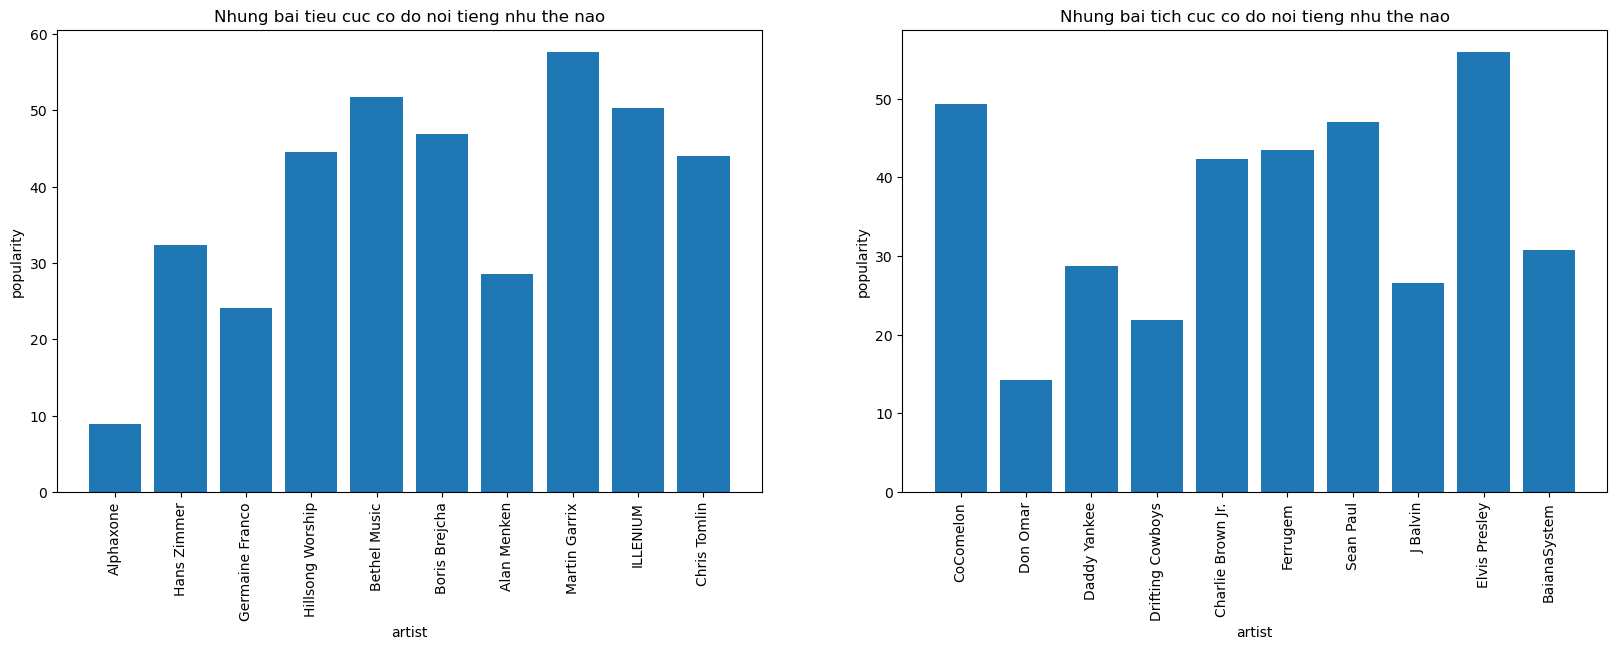

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Biểu đồ 1
ax1.bar(merge_df['artist'], merge_df['popularity'])
ax1.set_title('Nhung bai tieu cuc co do noi tieng nhu the nao')
ax1.set_xlabel('artist')
ax1.set_ylabel('popularity')
ax1.tick_params(axis='x', rotation=90)

# Biểu đồ 2
ax2.bar(merge_df1['artist'], merge_df1['popularity'])
ax2.set_title('Nhung bai tich cuc co do noi tieng nhu the nao')
ax2.set_xlabel('artist')
ax2.set_ylabel('popularity')
ax2.tick_params(axis='x', rotation=90)

# Hiển thị figure
plt.show()

* Qua biểu đồ ta thấy được độ phổ biến của những bài hát tiêu cực có độ nổi tiếng cao hơn so những bài hát tích cực  
* Trong biểu đồ tiêu cực ta thấy được nghệ sĩ có độ nổi tiếng nhiều nhất là Martin Garrix ta cũng có thể hiểu được vì Martin Garrix là DJ nhạc sĩ nổi tiếng xuất hiện trên nhiều nền tảng như youtube, spotify, apple music và có nhiều bài tiêu cực trở thành viral 
* Tronng biểu đồ tích cực ta thấy được nghệ sĩ có đội nổi tiếng nhiều nhất là Elvis Presley ta cũng có thể hiểu vì ông được coi là một trong những biểu tượng đại chúng quan trọng nhất của thế kỷ 20 và được mệnh danh là "Ông hoàng nhạc Rock and Roll".
* Lý do những bài hát tiêu cực thường có độ nổi tiếng hơn do giới trẻ hiện nay có xu hướng nghe nhạc tiêu cực vì
có thể xu hướng âm nhạc trong một khu vực hoặc quốc gia cụ thể làm cho bài hát tiêu cực phù hợp với sở thích và xu hướng hiện tại hơn so với bài hát tích cực.


# Reflection
1. **Bạn gặp khó khăn gì?** 
* Em đã gặp khó khăn mất khá nhiều thời gian để hiểu bộ data với ý nghĩa của từng cột thuộc tính 
2. **Bạn đã học được những gì?** 
* Em đã học được Hiểu các phương pháp xử lý vô số giá trị nhiễu có thể phát sinh trong quá trình trả lời câu hỏi.
* Biết cách sử dụng Git và Github cũng như làm việc nhóm trên nền tảng này

